<a href="https://colab.research.google.com/github/TIANBOQIU/AppliedDeepLearning/blob/master/HW1_part2_v0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tf-nightly-2.0-preview

    100% |████████████████████████████████| 75.6MB 535kB/s 
    100% |████████████████████████████████| 348kB 21.7MB/s 
    100% |████████████████████████████████| 61kB 25.0MB/s 
    100% |████████████████████████████████| 3.2MB 11.6MB/s 


In [0]:
from __future__ import absolute_import, print_function, division
import tensorflow as tf
print(tf.__version__)

2.0.0-dev20190205


In [0]:
# Data
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [0]:
train_data = train_data/255.0
test_data = test_data/255.0
BATCH_SIZE = 512
BUFFER_SIZE = len(train_data)

val_data = train_data[:10000]
val_labels = train_labels[:10000]
train_data = train_data[10000:]
train_labels = train_labels[10000:]

#train = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
train = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).batch(BATCH_SIZE)
test = tf.data.Dataset.from_tensor_slices((test_data, test_labels)).batch(BATCH_SIZE)
val = tf.data.Dataset.from_tensor_slices((val_data, val_labels)).batch(BATCH_SIZE)

In [0]:
class LinearModel(keras.Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = keras.layers.Flatten(input_shape=(28,28))
    self.d1 = keras.layers.Dense(10, activation=tf.nn.softmax)
   
  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)

model = LinearModel()

loss_function = keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = keras.optimizers.Adam()

acc = keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_acc = keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
val_acc = keras.metrics.SparseCategoricalAccuracy(name='validation_accuracy')

history = {'acc':[],'val_acc':[]}


def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    train_loss = loss_function(y_true=labels, y_pred=predictions)
  
  gradients = tape.gradient(train_loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  
  acc(labels,predictions)
  return acc.result()

  
def test_step(images, labels):
  global history
  predictions = model(images)
  test_loss = loss_function(y_true=labels, y_pred = predictions)
  
  test_acc(labels, predictions)
  
  
def val_step(images, labels):
  predictions = model(images)
  val_loss = loss_function(y_true=labels, y_pred = predictions)
  
  val_acc(labels, predictions)
  return val_acc.result()
  
EPOCHS = 50





for epoch in range(EPOCHS):
  for images, labels in train:
    train_step(images, labels)
    
  for val_images, val_labels in val:
    val_step(val_images, val_labels)
    
  template = "Epoch {}, Training accuracy: {:.2f}, Validation accuracy: {:.2f}"
  history['acc'].append(acc.result())
  history['val_acc'].append(val_acc.result())
  print(template.format(epoch+1, acc.result()*100, val_acc.result()*100))

Epoch 1, Training accuracy: 65.01, Validation accuracy: 75.33
Epoch 2, Training accuracy: 71.38, Validation accuracy: 77.44
Epoch 3, Training accuracy: 74.36, Validation accuracy: 78.62
Epoch 4, Training accuracy: 76.21, Validation accuracy: 79.40
Epoch 5, Training accuracy: 77.49, Validation accuracy: 80.05
Epoch 6, Training accuracy: 78.44, Validation accuracy: 80.59
Epoch 7, Training accuracy: 79.18, Validation accuracy: 81.02
Epoch 8, Training accuracy: 79.78, Validation accuracy: 81.38
Epoch 9, Training accuracy: 80.28, Validation accuracy: 81.69
Epoch 10, Training accuracy: 80.71, Validation accuracy: 81.96
Epoch 11, Training accuracy: 81.07, Validation accuracy: 82.19
Epoch 12, Training accuracy: 81.39, Validation accuracy: 82.40
Epoch 13, Training accuracy: 81.68, Validation accuracy: 82.58
Epoch 14, Training accuracy: 81.93, Validation accuracy: 82.74
Epoch 15, Training accuracy: 82.16, Validation accuracy: 82.88
Epoch 16, Training accuracy: 82.37, Validation accuracy: 83.01
E

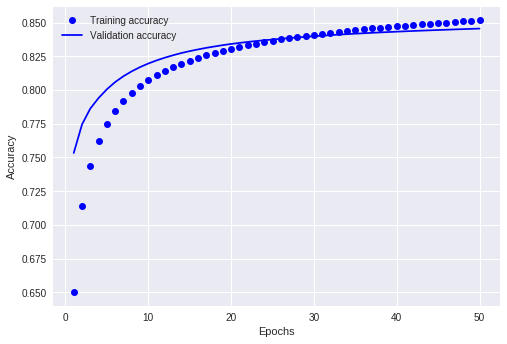

In [0]:
import matplotlib.pyplot as plt
def plot_acc(history):
  history_dict = history
  acc = history_dict['acc']
  val_acc = history_dict['val_acc']
  
  epochs = range(1, len(acc)+1)
  
  plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()
  
plot_acc(history)
#len(history['val_acc'])